[2.5900352, 2.4554503, 2.266436, 6.2270374, 3.2944946, 7.7557564, 6.3050313, 3.321289, 2.814125, 6.816602, 3.243486, 7.7063036, 6.459164, 3.1401162, 2.6745448, 6.7056613, 3.3325112, 7.650065, 6.388969, 3.181569, 2.5554912, 6.2127013, 3.0525084, 2.4928067, 6.739628, 2.8109055, 2.2107046, 4.6338954, 4.5254564, 2.4779603, 6.582324, 2.6712725, 2.1790738, 6.592617, 2.701532, 2.2118943, 5.2833757, 4.572437, 7.4577513, 6.135896, 2.7123098, 2.190171, 6.573834, 2.6011615, 2.2317426, 7.070985, 2.5250878, 2.1148338, 6.630476, 2.4618237, 2.157729, 6.382758, 2.4628873, 7.03583, 6.7312374, 2.261471, 6.898737, 5.2330375, 1.937475, 1.9203129, 6.642542, 2.2959251, 1.9876822, 6.263808, 2.3149981, 6.8292046, 6.287532, 2.40284, 6.950468, 6.472821, 2.1234286]
71
[7.3119215, 17.2772884, 12.4404453, 17.7663916, 12.273825, 17.6882375, 12.126029200000001, 11.758016399999999, 11.7612381, 11.637312099999999, 11.4326703, 11.506043299999998, 17.313564, 11.038376799999998, 11.4067381, 11.7109066, 11.2500287, 15.881

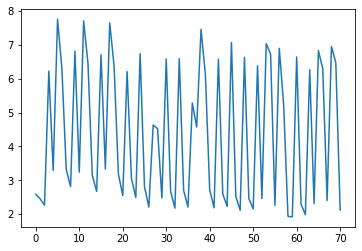

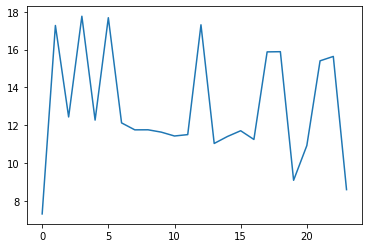

[array([ 0.00272303, -0.0049471 , -0.0086569 ,  0.00390936,  0.00071819,
        0.00010569,  0.00447801,  0.00775135, -0.00576726,  0.00179313,
        0.00068505,  0.00289815,  0.00020139, -0.00054513,  0.00121968,
        0.00447327, -0.0061948 , -0.00490692,  0.00388714,  0.00351632,
        0.00328374,  0.00495465, -0.00632403,  0.00085038, -0.00618296,
       -0.00740603, -0.00338294, -0.00103068, -0.00510306,  0.00286218,
        0.00033134,  0.00156609,  0.00828233,  0.00549928,  0.01280762,
       -0.00513252]), array([ 1.50362903e-03, -4.46294434e-03, -7.97320064e-03,  5.04175294e-03,
        1.16970274e-03,  4.12224850e-04,  2.37972382e-03,  7.67050777e-03,
       -5.37465187e-03,  4.07764397e-04, -3.41229606e-04,  9.37325065e-04,
        9.00591665e-04, -3.72874783e-04,  1.49703899e-03,  3.68559617e-03,
       -4.39368654e-03, -6.70985412e-03,  1.94756046e-03,  4.01417306e-03,
        2.77533079e-03,  4.71385242e-03, -7.20105274e-03,  4.18885378e-04,
       -6.62661949e-03,

In [201]:
import numpy as np
import matplotlib.pyplot as plt

f = open("/home/yunke/prl_proj/panda_ws/src/franka_cal_sim/python/replay_buffers/replay_buffer_tiny.txt", "r")
obs, actions, rewards, next_obs, terminals = [],[],[],[],[]
for line in f:
    cols = line.strip().split('\t')
    obs_s = cols[0].split(';')
    obs_t = []
    for obss in obs_s:
        obs_t.append([float(v) for v in obss.split(',')])
    obs_s_tp1 = cols[3].split(';')
    obs_tp1 = []
    for obss in obs_s_tp1:
        obs_tp1.append([float(v) for v in obss.split(',')])
    obs_t = np.array(obs_t)
    obs.append(obs_t)
    action = np.array([float(v) for v in cols[1].split(',')])
    actions.append(action)
    rewards.append(float(cols[2]))
    obs_tp1 = np.array(obs_tp1)
    next_obs.append(obs_tp1)
    terminals.append(bool(cols[4]=="True"))


print(rewards)
rewards = rewards[:]
print(len(rewards))
episode_rewards = []
for i in range(0,len(rewards),3):
    episode_rewards.append(np.sum(rewards[i:i+3]))
print(episode_rewards)
plt.plot(rewards)
plt.show()
plt.plot(episode_rewards)
plt.show()
#print(episode_rewards[-7])
print(actions[-7:-4])
print(len(rewards))
#print(actions)
print(rewards[-7:-4]) #156 159
np.savetxt("/home/yunke/prl_proj/panda_ws/src/franka_cal_sim/python/action_tiny2.txt",actions[-7:-4])
print(abs(actions[0]))